In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
from utils import train_loop, test_loop
from models import CNN_conv_layer

num_epochs = 20
lr = 0.001

model = CNN_conv_layer()
model.to(device= device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

tr_acc, te_acc = [], []
tr_loss, te_loss = [], []

best_acc = 0

for epoch in range(num_epochs):
    train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

    print('Train Acc epoch {} : {} '.format(epoch, train_correct))
    print('Test Acc epoch {} : {} '.format(epoch, test_correct))

    tr_acc.append(train_correct)
    te_acc.append(test_correct)

    tr_loss.append(train_loss)
    te_loss.append(test_loss)


c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Acc epoch 0 : 0.8303833333333334 
Test Acc epoch 0 : 0.8689 
Train Acc epoch 1 : 0.8799833333333333 
Test Acc epoch 1 : 0.8793 
Train Acc epoch 2 : 0.8908166666666667 
Test Acc epoch 2 : 0.8908 
Train Acc epoch 3 : 0.8961166666666667 
Test Acc epoch 3 : 0.8859 
Train Acc epoch 4 : 0.9037166666666666 
Test Acc epoch 4 : 0.883 
Train Acc epoch 5 : 0.9091333333333333 
Test Acc epoch 5 : 0.885 
Train Acc epoch 6 : 0.9136833333333333 
Test Acc epoch 6 : 0.8869 
Train Acc epoch 7 : 0.9176333333333333 
Test Acc epoch 7 : 0.8914 
Train Acc epoch 8 : 0.9214333333333333 
Test Acc epoch 8 : 0.8911 
Train Acc epoch 9 : 0.9245333333333333 
Test Acc epoch 9 : 0.8882 
Train Acc epoch 10 : 0.92775 
Test Acc epoch 10 : 0.8835 
Train Acc epoch 11 : 0.9313166666666667 
Test Acc epoch 11 : 0.8683 
Train Acc epoch 12 : 0.9359333333333333 
Test Acc epoch 12 : 0.8677 
Train Acc epoch 13 : 0.9367 
Test Acc epoch 13 : 0.8707 
Train Acc epoch 14 : 0.94145 
Test Acc epoch 14 : 0.8864 
Train Acc epoch 15 : 

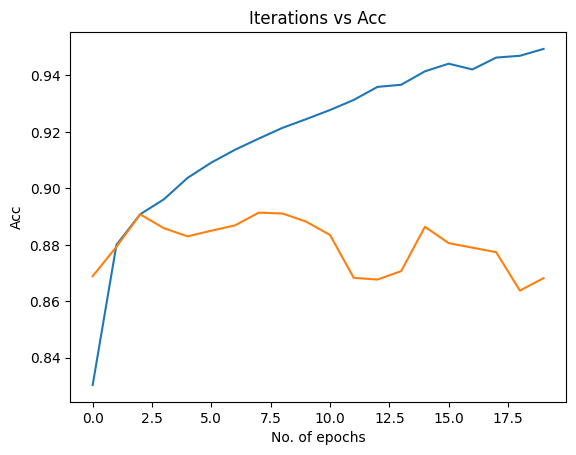

In [5]:
plt.plot(range(num_epochs), tr_acc)
plt.plot(range(num_epochs), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

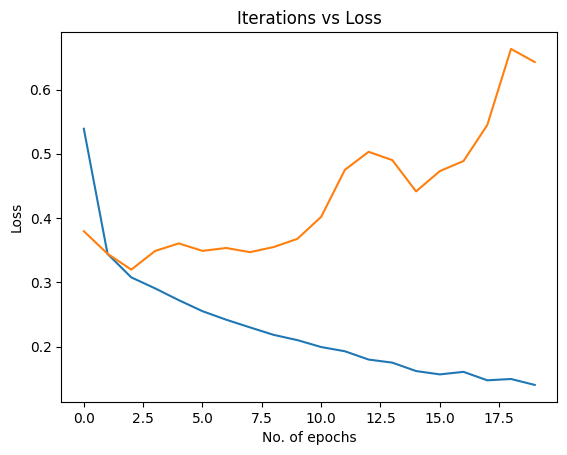

In [6]:
plt.plot(range(num_epochs), tr_loss)
plt.plot(range(num_epochs), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [7]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.8914 | Best Epoch : 7


## Pickle out results and accuracies

In [8]:
import pickle
import os

file_name = 'baseline_CNN_conv_4layer.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [9]:
file_name = 'baseline_CNN_conv_4layer.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8303833333333334, 0.8799833333333333, 0.8908166666666667, 0.8961166666666667, 0.9037166666666666, 0.9091333333333333, 0.9136833333333333, 0.9176333333333333, 0.9214333333333333, 0.9245333333333333, 0.92775, 0.9313166666666667, 0.9359333333333333, 0.9367, 0.94145, 0.94415, 0.9421166666666667, 0.9463166666666667, 0.94695, 0.9493833333333334]
[0.8689, 0.8793, 0.8908, 0.8859, 0.883, 0.885, 0.8869, 0.8914, 0.8911, 0.8882, 0.8835, 0.8683, 0.8677, 0.8707, 0.8864, 0.8806, 0.879, 0.8774, 0.8638, 0.8682]
[0.538939377582912, 0.3441876121866169, 0.30762434917599407, 0.2905745173313979, 0.2721841029489218, 0.2550024483630906, 0.2417412833777318, 0.22979026799326513, 0.21814067051736022, 0.20996217920518379, 0.19922324897510918, 0.1926332216527162, 0.17972683215509855, 0.1749085061696928, 0.16185775133115904, 0.15662793077226642, 0.16057026103488417, 0.14743713704126477, 0.14947463958851817, 0.14024943026747785]
[0.3795094897475424, 0.34443348118021516, 0.31970082544073275, 0.34868325858931, 0.36